<a href="https://colab.research.google.com/github/jaewonlee16/Linear-Algebra/blob/master/hw4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear algebra for electrical systems homework 4
### <i> Determinants and SVD -- DUE 11/24

#####  - Professor Young Min Kim
#####  - TAs: Junho Lee, Hojun Jang
#####  - TA email: twjhlee@snu.ac.kr
***

### <b> Problem 1 - Determinants via recursion
In this problem you will be asked to complete a function to calculate the determinant of a matrix via Laplace expansion.
The given function get determinant is a recursive function which aims to find the determinant by perfoming Laplace expansion on the first row of the given matrix.
See https://en.wikipedia.org/wiki/Laplace_expansion for further details on Laplace expansion
##### Please read the comments carefully and fill in the TODO marks

In [1]:
import numpy as np
import time

In [3]:
def get_determinant(matrix):
    """Function to get determinant via recursion. Termination conditions: matrix is a 2-by-2 matrix
    When given matrix is 2-by-2, use known determinant calculation equation, else, use recursion
    [Input]:
        matrix: np.ndarray of NxN shape(N >= 2)
    """
    H, W = matrix.shape
    if H == 2 and W == 2:
        # Termination condition
        #################### TODO ##########################
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    else:
        #################### TODO ##########################
        result = 0
        for column, element in enumerate(matrix[0]):
            next_matrix = matrix[1:]
            left = next_matrix[:, :column]
            right = next_matrix[:, column + 1:]
            next_matrix = np.concatenate((left, right), axis = 1)
            result += (1 - 2 * (column % 2)) * element * get_determinant(next_matrix)
        return result


In [25]:
# Now, let's test the function's correctness!
A = np.array([
    [1, 0, 1],
    [2, 0 ,-1],
    [-3, 1, 2]
])

det = get_determinant(A)
npDet = int(np.linalg.det(A))
print(det, npDet)

if det == npDet:
    print("Success!")
else:
    print("Try again")


3 3
Success!


### <b> Problem 2 - Determinants via LU decomposition
We've implemented a function to get the determinants via recursion.
However, this approach has a crucial drawback.
It get's exponentially slower when the input matrix gets larger.
This can be avoided via LU decompostion!
For triangular matrices L and U, you can calculate the determinant by simply multiplying the diagonal elements.
More information can be found here: https://en.wikipedia.org/wiki/LU_decomposition#Computing_the_determinant
In this question, you will be asked to simulate this and compare with numpy's determinant function and use LU decomposition to prevent such time complexity.
##### Please read the comments carefully and fill in the TODO marks

In [26]:
# simulate for input matrix of dimensions 2 to 10
# will take about 30 seconds
reps = []
reps_np = []
for dim in range(2, 11):
    example = np.random.randint(5, size=(dim, dim))
    tick = time.time()
    det = get_determinant(example)
    tock = time.time()
    reps.append(tock - tick)
    tick = time.time()
    npDet = np.linalg.det(example)
    tock = time.time()
    reps_np.append(tock - tick)

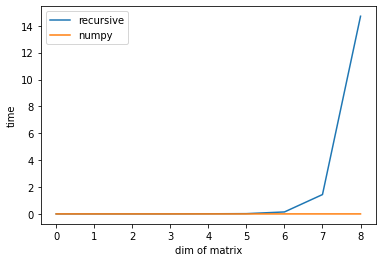

In [5]:
# visualization of the results
import matplotlib.pyplot as plt
plt.plot(reps, label='recursive')
plt.plot(reps_np, label='numpy')
plt.xlabel('dim of matrix')
plt.ylabel('time')
plt.legend()

In [30]:
# Use LU decomposition to obtain the determinant of a matrix
from scipy.linalg import lu
reps = []
for dim in range(2, 11):
    example = np.random.randint(5, size=(dim, dim))
    tick = time.time()
    P, L, U = lu(example)
    nswaps = len(np.diag(P)) - np.sum(np.diag(P)) - 1

    detP = np.linalg.det(P)
    ################ TODO ##################
    """
    From the LU decomposition results of the exmaple matrix, obtain the determinants for L and U.
    Then the determinant for the original matrix can be obtined by multiplying the determinants for all P, L, and U.
    The determinants for P are given
    """
    det = (-1)**nswaps
    for i in range(len(L)):
      det *= L[i][i]
    for j in range(len(U)):
      det *= U[j][j]

    
    tock = time.time()
    reps.append(tock - tick)
    # print(det, np.linalg.det(example))

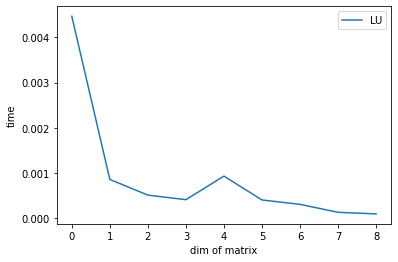

In [31]:
#visualization of the results
plt.plot(reps, label='LU')
plt.xlabel('dim of matrix')
plt.ylabel('time')
plt.legend()

### <b> Problem 3 - SVD
What is the solution of $Ax = b$?
Since $A$'s inverse may not exist, we will look for a least square solution via getting the left pseudoinvert of $A$.
This can be done via singular value decompositon or SVD.
As you've learned in class, afte SVD, an $m$ by $n$ matrix can be written as 
$A = U \Sigma V^{\top}$.
The left pseudoinverse $A^{+}$ can be written down as
$A^{+} = V \Sigma^{+} U^{\top}$,
where $\Sigma^+$ is a diagonal matrix consisting of the reciprocals(역수) of $A$'s singular values(followed by zeros).
##### In this question, you will be asked to complete the blanks to obtain the pseudoinverse of matrix $A$

In [23]:
def get_pinv(A):
    """This fucntion computes the Psuedo INVerse of A.
    Hint: use np.linalg.svd for singular value decomposition
    DO NOT USE ANY TYPE OF PINV LIBRARY
    [Input]
        A: np.ndarray input matrix
    [Returns]
        left psuedo inverse of A
    """
    ############################### TODO ##############################3
    U, S, Vt = np.linalg.svd(A)

    # make S a 2-D array
    n_row = len(Vt)
    n_col = len(U.T)
    matrix_S = np.zeros((n_row, n_col))
    for index, element in enumerate(S):
      matrix_S[index][index] = 1/element
    
    return (Vt.T) @ matrix_S @ (U.T)

In [24]:
## Let's check if you've got the correct results
A = np.random.randn(5, 4)
np_inv = np.linalg.pinv(A)
our_inv = get_pinv(A)
print(np.allclose(np_inv, our_inv))

A = np.random.randn(10, 6)
np_inv = np.linalg.pinv(A)
our_inv = get_pinv(A)
print(np.allclose(np_inv, our_inv))

A = np.random.randn(4, 3)
np_inv = np.linalg.pinv(A)
our_inv = get_pinv(A)
print(np.allclose(np_inv, our_inv))

A = np.random.randn(5, 7)
np_inv = np.linalg.pinv(A)
our_inv = get_pinv(A)
print(np.allclose(np_inv, our_inv))

True
True
True
True
